# Group3 Eda Project 
- Adonye Brown
- Folashade Adedapo {Queen Elizabeth}
- Kehinde Akinwoye  {Spakin}
- Mary Obazee
- Omolara Oyenuga 
- Peter Adedavo
- Shittu Idris  {Technocrat}


In [137]:

import pandas as pd #data preprocessing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import missingno as msno # missing data visualization
from collections import Counter #

In [3]:
st = pd.read_csv(r"C:\Users\TECHNOCRAT\Desktop\Sterling E-Commerce Data - Online Sales Data.csv")

In [4]:
st.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [5]:
st.tail(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
283080,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700520,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.8
283081,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700517,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.9
283082,Women's Fashion,Burkettsville,Mercer,81251,10/15/2013,12/30/2021 0:00,"Kester, Apolonia",F,700519,100428972.0,cod,Burkettsville,572291,Midwest,OH,azkester,45310,2,79.9


In [6]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Category        283083 non-null  object 
 1   City            283083 non-null  object 
 2   County          283083 non-null  object 
 3   Cust Id         283083 non-null  int64  
 4   Customer Since  283083 non-null  object 
 5   Date of Order   283083 non-null  object 
 6   Full Name       283083 non-null  object 
 7   Gender          283083 non-null  object 
 8   Item Id         283083 non-null  int64  
 9   Order Id        283078 non-null  float64
 10  Payment Method  283083 non-null  object 
 11  Place Name      283083 non-null  object 
 12  Ref Num         283083 non-null  int64  
 13  Region          283083 non-null  object 
 14  State           283083 non-null  object 
 15  User Name       283083 non-null  object 
 16  Zip             283083 non-null  int64  
 17  Qty Ordere

In [7]:
#Dimension of the data
st.shape

(283083, 19)

In [8]:
# checking for the features of the column in the dataset
st.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [9]:
st.describe()

,Cust Id,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total
count,283083.000000,283083.000000,2.830780e+05,283083.000000,283083.000000,283083.000000,283083.000000
mean,70106.816026,741747.110628,1.004570e+08,561107.885991,49147.171374,3.008224,816.230712
std,30215.394879,95664.609013,6.090992e+04,256101.205409,27235.561738,4.565168,1986.164932
min,4.000000,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000
25%,56640.000000,659898.500000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000
50%,74320.000000,742471.000000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000
75%,92371.000000,826078.500000,1.005134e+08,782211.000000,72004.000000,3.000000,800.000000
max,115326.000000,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000


In [10]:
# Data cleaning (extract date and month) 
# order id 
# How frequently the customer order
# plot gender against revenue
# Highest order by city
# Gender count
# Payment method by gender
# Payment method by revenue
# product category 
# product category by quantity order 

Data Cleaning 

In [11]:
#In the dataset colunn 9 has some missing values 
miss_vals =st.isnull().sum()
miss_vals

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [14]:
st.isnull()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283078,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
283079,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
283080,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
283081,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [28]:
st[st.isnull().any(axis=1)]

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Region,State,User Name,Zip,Qty Ordered,Total,year,month,month_name,quarter
38758,Soghaat,Leiters Ford,Fulton,111867,11/4/2010,2022-08-04,"Wright, Man",M,879766,NaN,...,Midwest,IN,mewright,46945,2,36.0,2022,8,August,3
38759,Soghaat,Leiters Ford,Fulton,111867,11/4/2010,2022-08-04,"Wright, Man",M,879765,NaN,...,Midwest,IN,mewright,46945,3,45.0,2022,8,August,3
133217,Mobiles & Tablets,Rock Point,Charles,92075,4/8/2014,2022-04-01,"Torkelson, Berneice",F,767619,NaN,...,South,MD,bttorkelson,20682,2,2919.9,2022,4,April,2
145889,Mobiles & Tablets,Uniopolis,Auglaize,111166,2/23/2017,2022-07-21,"Cannon, Shamika",F,872703,NaN,...,Midwest,OH,svcannon,45888,2,578.9,2022,7,July,3
224999,Computing,Barrington,Camden,40853,8/24/2009,2022-08-12,"Robichaux, Marion",M,883358,NaN,...,Northeast,NJ,mjrobichaux,8007,2,39.9,2022,8,August,3


In [16]:
st.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,Payment Method,Place Name,Ref Num,Region,State,User Name,Zip,Qty Ordered,Total
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,8/7/2022 0:00,"Renaud, Maudie",F,880913,100547952.0,Easypay_MA,Bode,352808,Midwest,IA,mcrenaud,50519,3,32.0
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881493,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.8
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,8/8/2022 0:00,"Shimp, Mariela",F,881492,100548328.0,Easypay_MA,Belleville,310849,Midwest,IL,mgshimp,62223,2,74.9
3,Computing,Young America,Carver,112501,9/15/2013,8/18/2022 0:00,"Doiron, Latrina",F,886067,100551079.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,6822.9
4,Entertainment,Young America,Carver,112501,9/15/2013,8/20/2022 0:00,"Doiron, Latrina",F,886878,100551618.0,Payaxis,Young America,578056,Midwest,MN,lmdoiron,55552,2,2849.9


In [18]:
st["Date of Order"] = pd.to_datetime(st["Date of Order"])
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  object        
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [24]:
#extarct month, month_name and quarter from date of order
# st['year'] = st["Date of Order"].dt.year
st['month'] = st["Date of Order"].dt.month
st['month_name'] = st["Date of Order"].dt.month_name()
st['quarter'] = st["Date of Order"].dt.quarter
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  object        
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [26]:
st.head(3)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,Region,State,User Name,Zip,Qty Ordered,Total,year,month,month_name,quarter
0,Health & Sports,Bode,Humboldt,112285,2/11/2008,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,Midwest,IA,mcrenaud,50519,3,32.0,2022,8,August,3
1,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.8,2022,8,August,3
2,Men's Fashion,Belleville,St. Clair,112386,6/23/2005,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,Midwest,IL,mgshimp,62223,2,74.9,2022,8,August,3


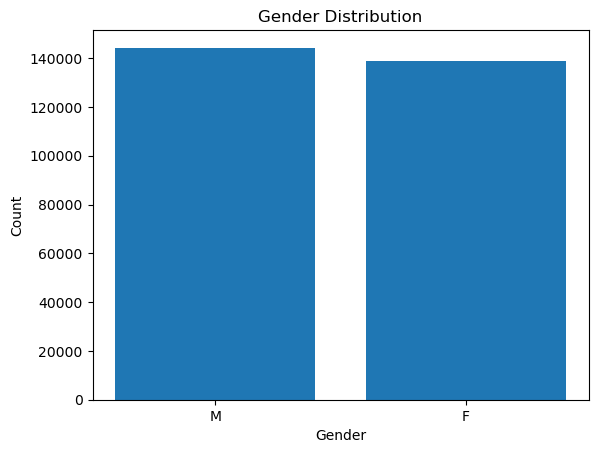

In [33]:
#gender count 
gender_counts = st['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [61]:
# # lets try pie chart 
# gender_counts = st['Gender'].value_counts()
# lables = gender_counts.index
# sizes = gender_counts.values
# plt.pie(sizes, labels=lables, )
# # plt.bar(gender_counts.index, gender_counts.values)
# # plt.xlabel('Gender')
# # plt.ylabel('Count')
# plt
# plt.title('Gender Distribution')
# plt.show()

In [35]:
st.describe()

,Cust Id,Item Id,Order Id,Ref Num,Zip,Qty Ordered,Total,year,month,quarter
count,283083.000000,283083.000000,2.830780e+05,283083.000000,283083.000000,283083.000000,283083.000000,283083.000000,283083.000000,283083.000000
mean,70106.816026,741747.110628,1.004570e+08,561107.885991,49147.171374,3.008224,816.230712,2021.619189,7.353179,2.708983
std,30215.394879,95664.609013,6.090992e+04,256101.205409,27235.561738,4.565168,1986.164932,0.485587,3.838077,1.160561
min,4.000000,574769.000000,1.003547e+08,111127.000000,210.000000,1.000000,0.000000,2021.000000,1.000000,1.000000
25%,56640.000000,659898.500000,1.004047e+08,341071.000000,26264.000000,2.000000,49.900000,2021.000000,4.000000,2.000000
50%,74320.000000,742471.000000,1.004518e+08,565623.000000,48808.000000,2.000000,149.800000,2022.000000,7.000000,3.000000
75%,92371.000000,826078.500000,1.005134e+08,782211.000000,72004.000000,3.000000,800.000000,2022.000000,12.000000,4.000000
max,115326.000000,905208.000000,1.005624e+08,999981.000000,99402.000000,501.000000,101262.590000,2022.000000,12.000000,4.000000


In [38]:
st.describe(include=['object','bool'])

,Category,City,County,Customer Since,Full Name,Gender,Payment Method,Place Name,Region,State,User Name,month_name
count,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083,283083
unique,15,15668,2518,11629,63610,2,13,15668,4,49,63407,12
top,Mobiles & Tablets,Dekalb,Jefferson,11/30/2005,"Gonzalez, Joel",M,cod,Dekalb,South,TX,jugonzalez,December
freq,60954,2525,3510,2536,2524,144295,101750,2525,103482,17510,2524,81607


In [45]:
max_value = st['Customer Since'].max()
max_value

'9/9/2016'

In [46]:
min_value = st['Customer Since'].min()
min_value

'1/1/1986'

In [48]:
#create a function for customer group from customer since to determine old and new customers
def cus_group(x):
    if x <= 2006:
        return "Old Customer"
    else:
        return "New Customer"

In [57]:
cus_group(2006)

'Old Customer'

In [79]:
#extract year from customer Since
st['cus_group'] = st['year'].apply(cus_group)

In [80]:
st.tail()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,State,User Name,Zip,Qty Ordered,Total,year,month,month_name,quarter,cus_group
283078,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700522,100428972.0,...,OH,azkester,45310,2,69.8,2013,12,December,4,New Customer
283079,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700518,100428972.0,...,OH,azkester,45310,2,69.9,2013,12,December,4,New Customer
283080,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700520,100428972.0,...,OH,azkester,45310,2,79.8,2013,12,December,4,New Customer
283081,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700517,100428972.0,...,OH,azkester,45310,2,79.9,2013,12,December,4,New Customer
283082,Women's Fashion,Burkettsville,Mercer,81251,2013-10-15,2021-12-30,"Kester, Apolonia",F,700519,100428972.0,...,OH,azkester,45310,2,79.9,2013,12,December,4,New Customer


In [81]:
st.head(10)

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,State,User Name,Zip,Qty Ordered,Total,year,month,month_name,quarter,cus_group
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,IA,mcrenaud,50519,3,32.0,2008,8,August,3,New Customer
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,IL,mgshimp,62223,2,74.8,2005,8,August,3,Old Customer
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,IL,mgshimp,62223,2,74.9,2005,8,August,3,Old Customer
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,...,MN,lmdoiron,55552,2,6822.9,2013,8,August,3,New Customer
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,...,MN,lmdoiron,55552,2,2849.9,2013,8,August,3,New Customer
5,Men's Fashion,Francesville,Pulaski,112235,2013-01-03,2022-08-06,"Shofner, Siobhan",F,880700,100547805.0,...,IN,shshofner,47946,2,99.9,2013,8,August,3,New Customer
6,Mobiles & Tablets,Francesville,Pulaski,112235,2013-01-03,2022-08-06,"Shofner, Siobhan",F,880695,100547801.0,...,IN,shshofner,47946,2,8180.0,2013,8,August,3,New Customer
7,Mobiles & Tablets,Francesville,Pulaski,112235,2013-01-03,2022-08-07,"Shofner, Siobhan",F,880993,100548009.0,...,IN,shshofner,47946,2,8180.0,2013,8,August,3,New Customer
8,Mobiles & Tablets,Francesville,Pulaski,112235,2013-01-03,2022-08-14,"Shofner, Siobhan",F,884389,100550076.0,...,IN,shshofner,47946,2,1396.0,2013,8,August,3,New Customer
9,Mobiles & Tablets,Francesville,Pulaski,112235,2013-01-03,2022-08-14,"Shofner, Siobhan",F,884393,100550079.0,...,IN,shshofner,47946,2,1396.0,2013,8,August,3,New Customer


In [72]:
st["Customer Since"] = pd.to_datetime(st["Customer Since"])


In [73]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [83]:
st['year'] = st["Customer Since"].dt.year
# st['year'] = st["Date of Order"].dt.year



In [78]:
st.head()

,Category,City,County,Cust Id,Customer Since,Date of Order,Full Name,Gender,Item Id,Order Id,...,State,User Name,Zip,Qty Ordered,Total,year,month,month_name,quarter,cus_group
0,Health & Sports,Bode,Humboldt,112285,2008-02-11,2022-08-07,"Renaud, Maudie",F,880913,100547952.0,...,IA,mcrenaud,50519,3,32.0,2008,8,August,3,New Customer
1,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881493,100548328.0,...,IL,mgshimp,62223,2,74.8,2005,8,August,3,New Customer
2,Men's Fashion,Belleville,St. Clair,112386,2005-06-23,2022-08-08,"Shimp, Mariela",F,881492,100548328.0,...,IL,mgshimp,62223,2,74.9,2005,8,August,3,New Customer
3,Computing,Young America,Carver,112501,2013-09-15,2022-08-18,"Doiron, Latrina",F,886067,100551079.0,...,MN,lmdoiron,55552,2,6822.9,2013,8,August,3,New Customer
4,Entertainment,Young America,Carver,112501,2013-09-15,2022-08-20,"Doiron, Latrina",F,886878,100551618.0,...,MN,lmdoiron,55552,2,2849.9,2013,8,August,3,New Customer


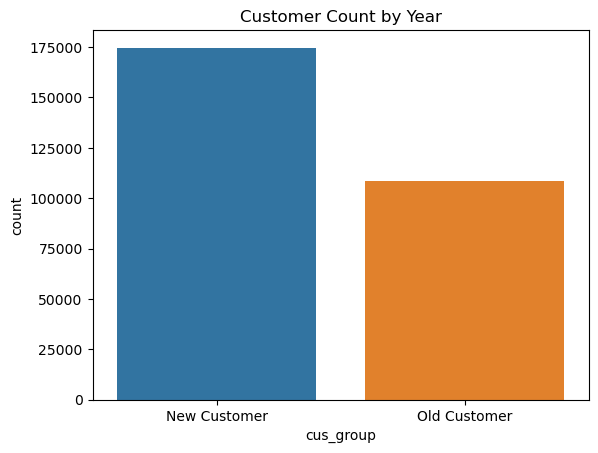

In [87]:
sns.countplot(x="cus_group", data=st);
plt.title('Customer Count by Year');



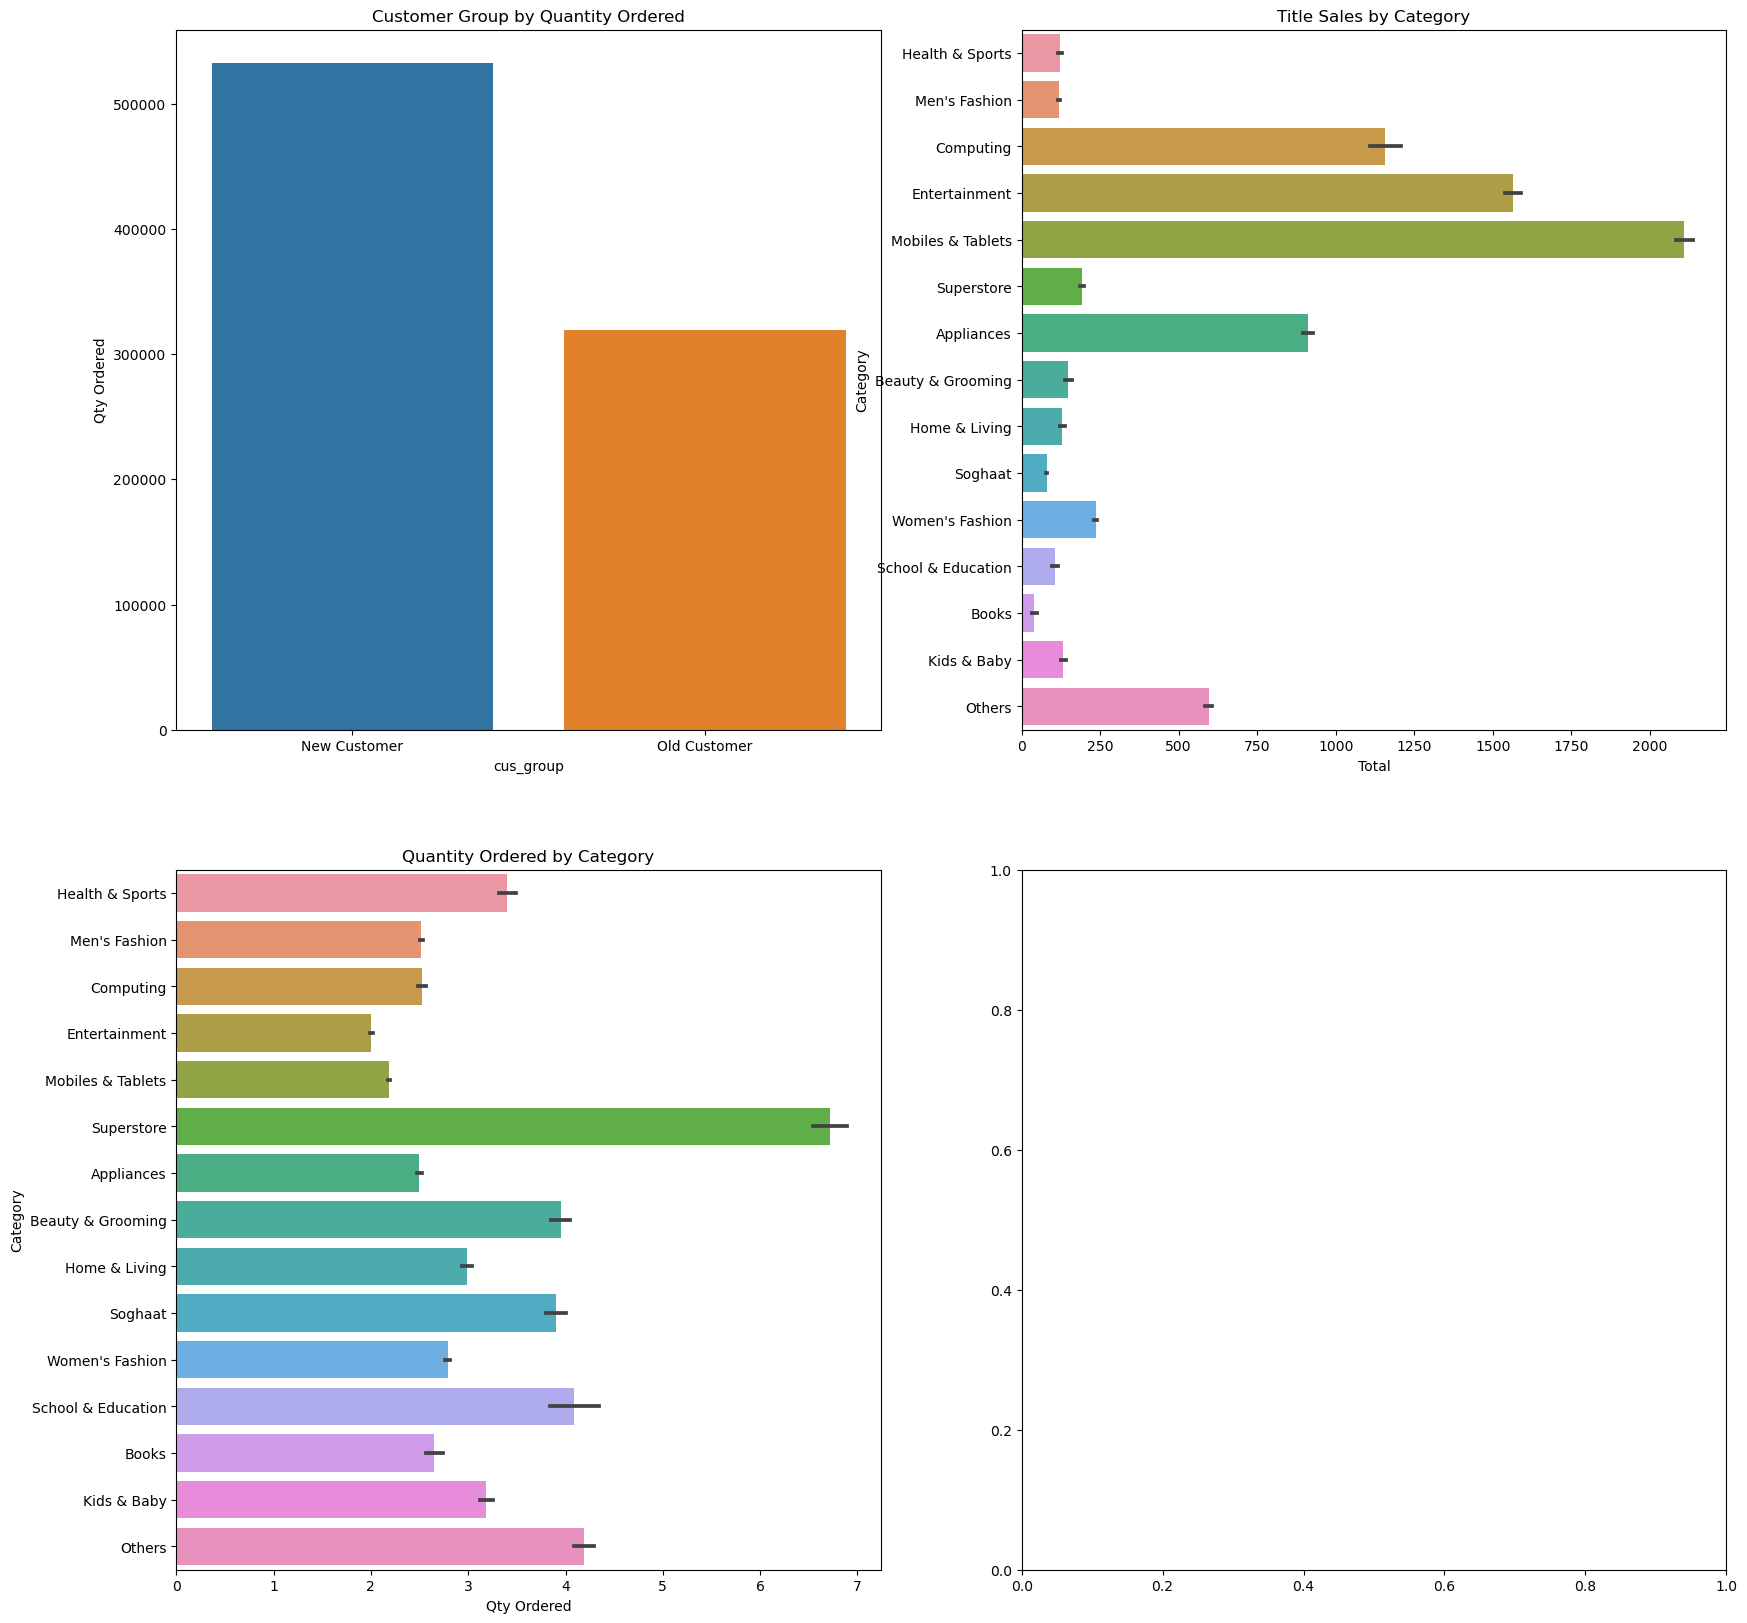

In [136]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20,20))
qty_ord = st.groupby('cus_group')['Qty Ordered'].sum().reset_index()
sns.barplot(x='cus_group', data=qty_ord, y='Qty Ordered', ax=axs[0,0])
axs[0,0].set_title('Customer Group by Quantity Ordered')

total = st.groupby('Category')['Total'].sum().reset_index()
sns.barplot(y='Category', data=st, x='Total', ax=axs[0,1])
axs[0,1].set_title('Title Sales by Category')

category = st.groupby('Category')['Qty Ordered'].sum().reset_index()
sns.barplot(y='Category', data=st, x='Qty Ordered', ax=axs[1,0])
axs[1,0].set_title('Quantity Ordered by Category');

# count = Counter(st['Gender'])
# ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f' {p: .2f}%', ax=axs[1,1])
# axs=[1,1].set_title("percentage of transactions by gender")
# # plt.show();

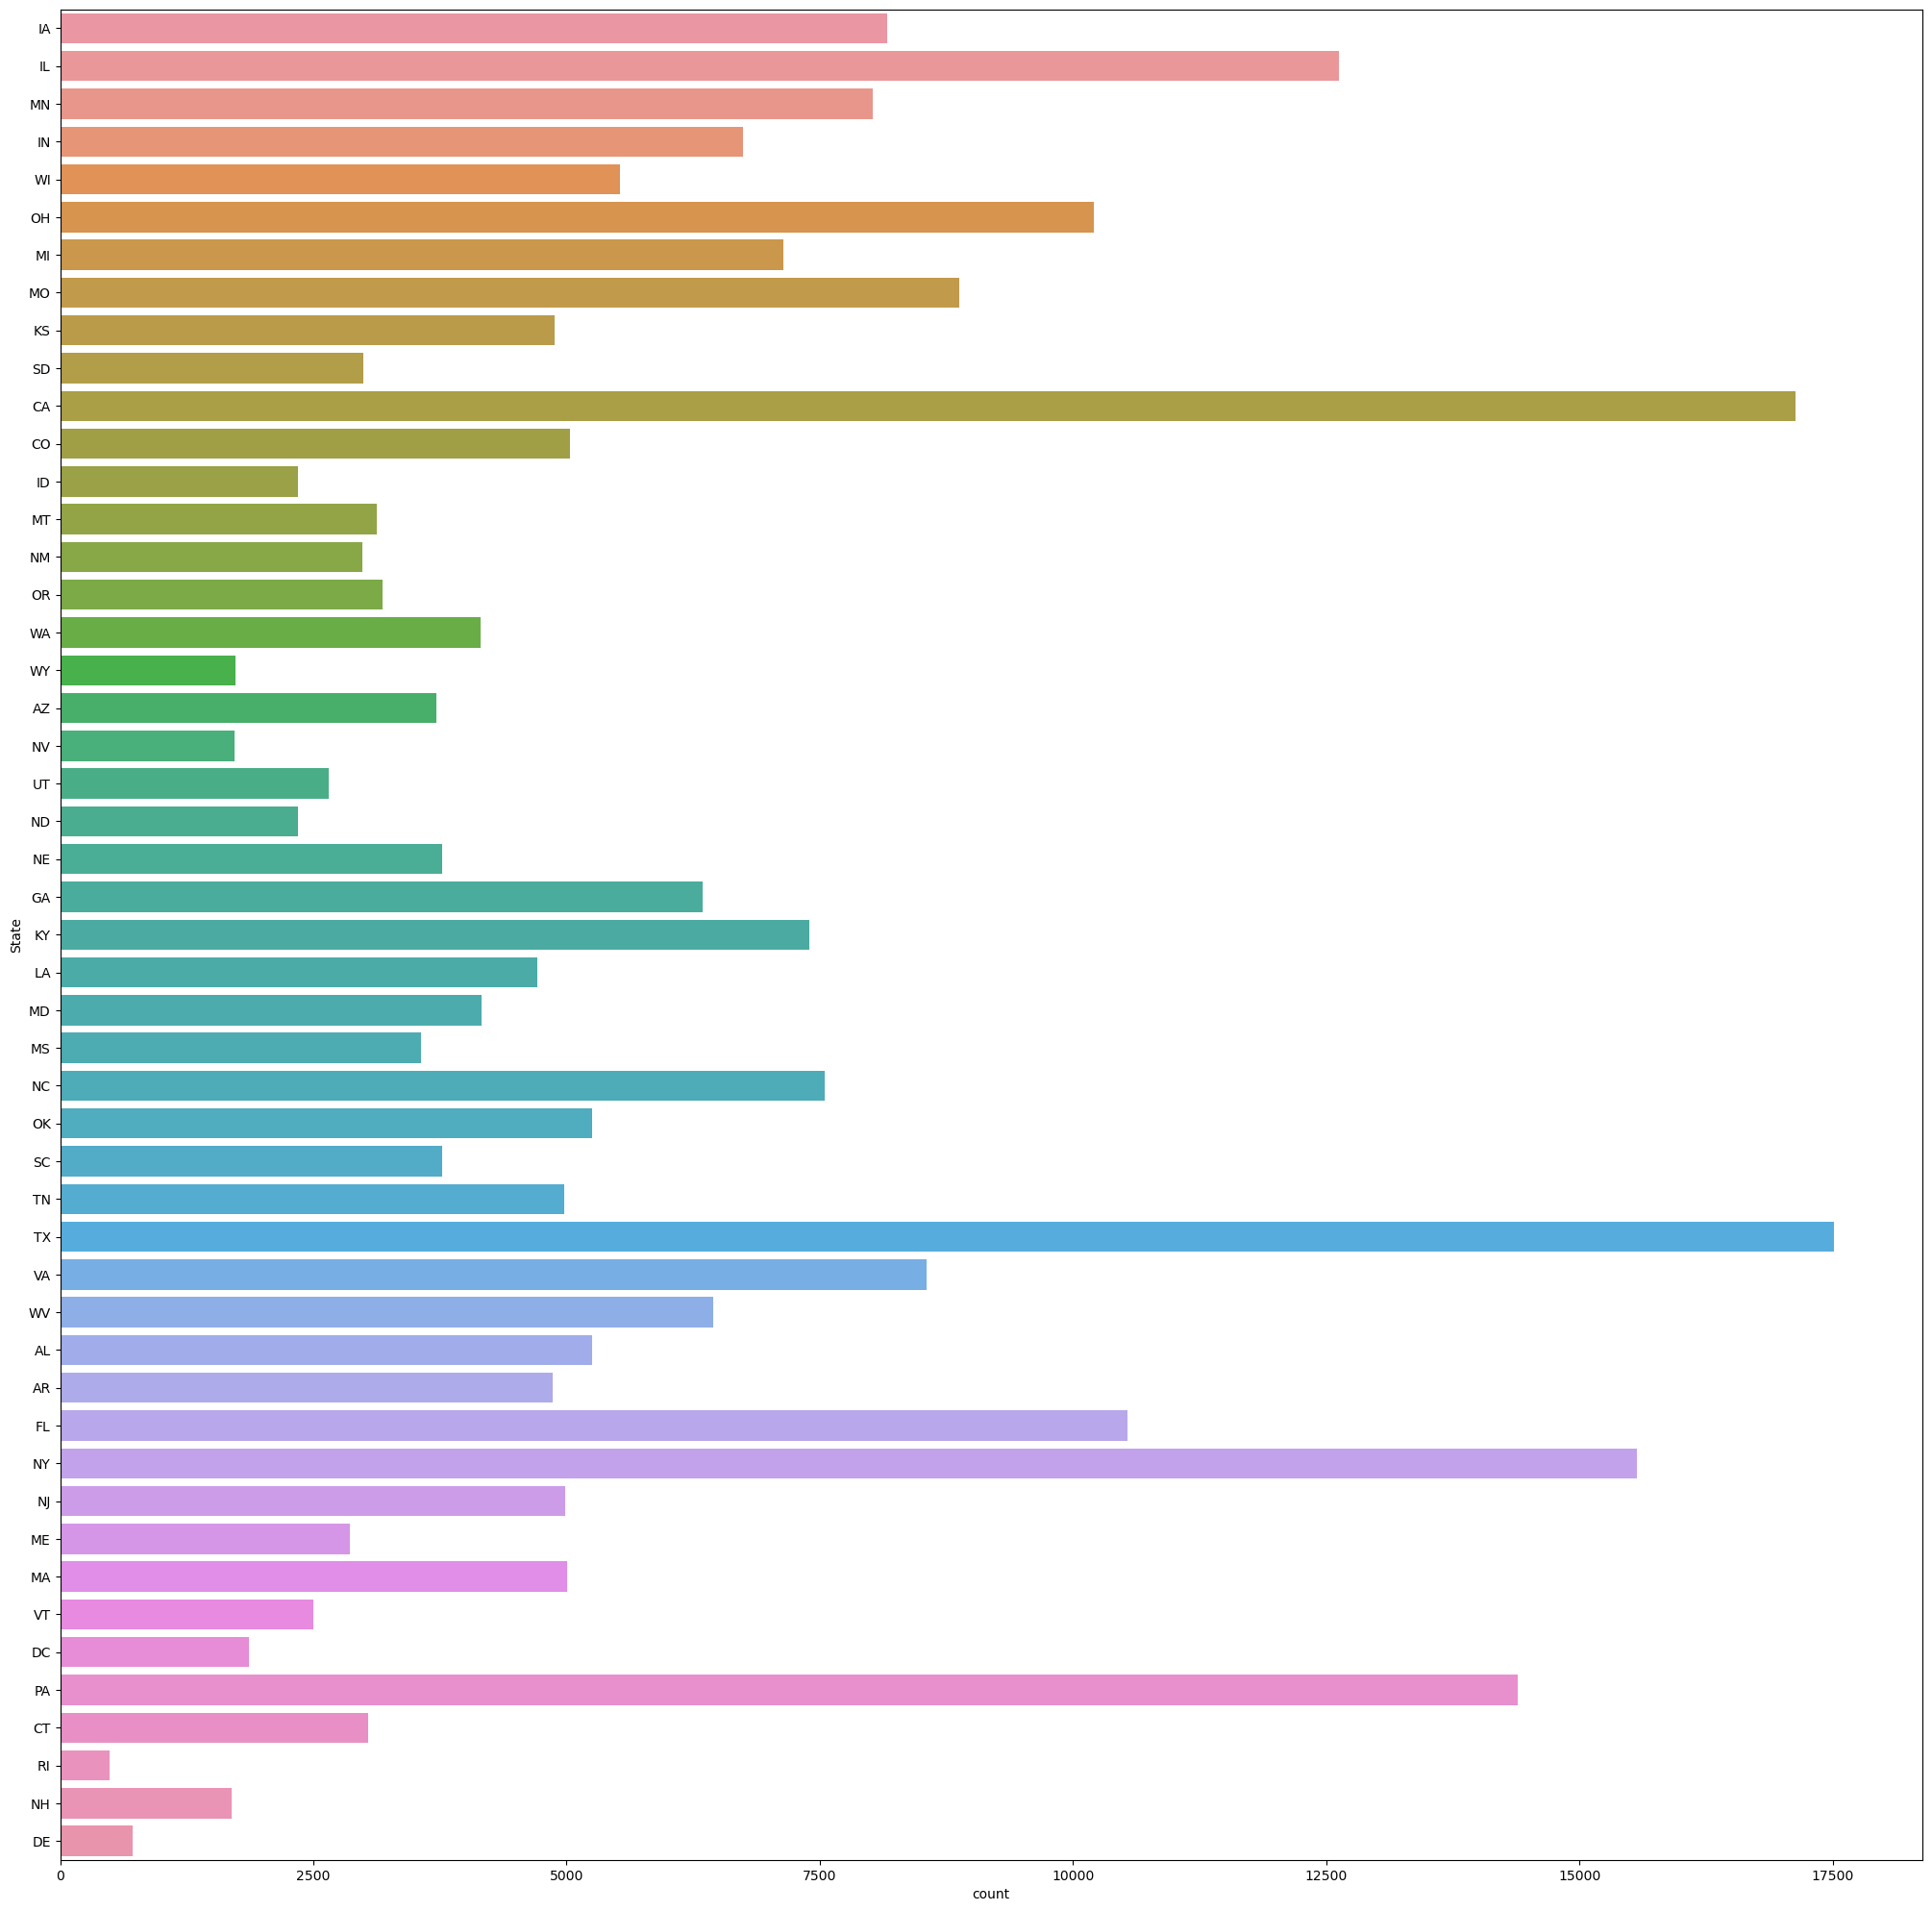

In [112]:
plt.title('Count of Order by State');
plt.figure(figsize=(25,25))
sns.countplot(y="State", data=st);

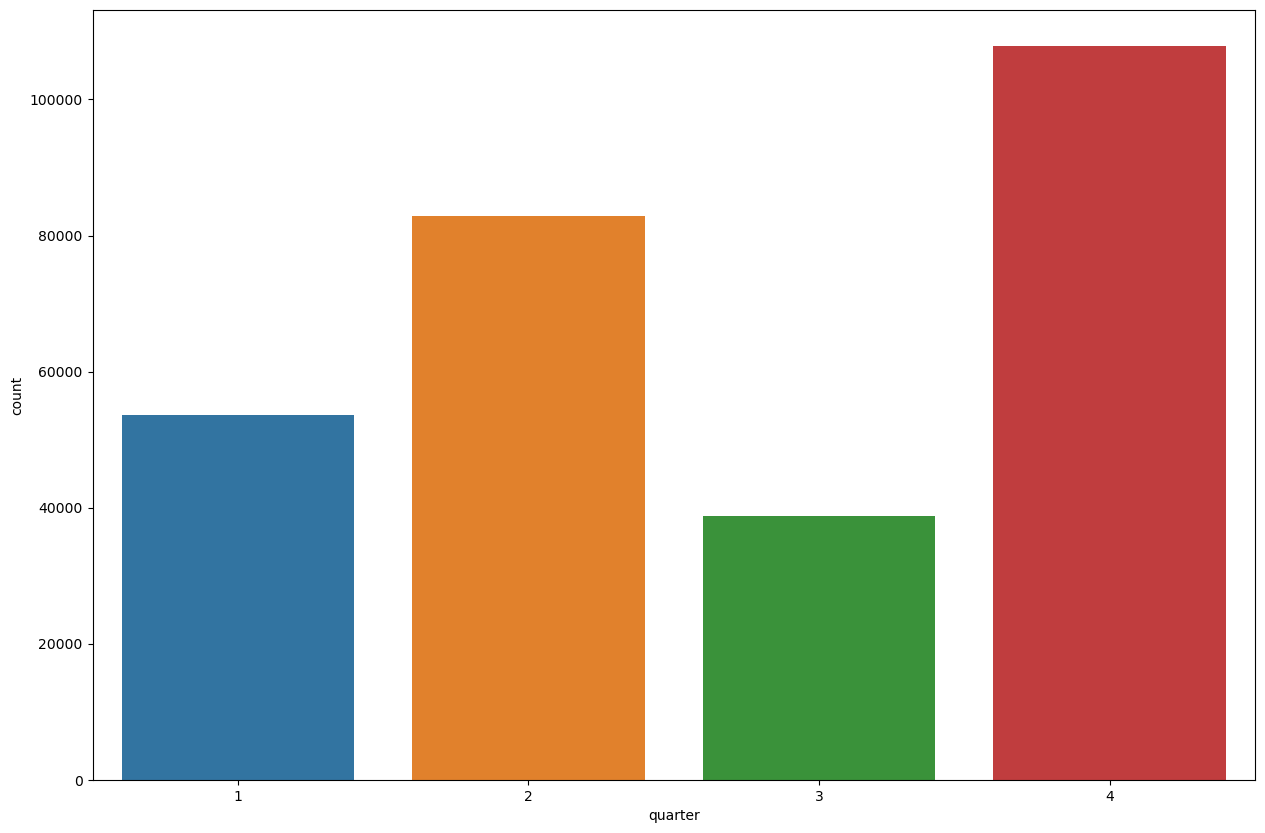

In [119]:
# plt.title('Count of Order by Quarter');
plt.figure(figsize=(15,10))
sns.countplot(x="quarter",data=st);

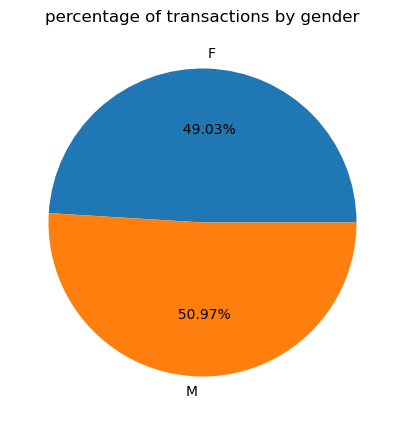

In [122]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(st['Gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f' {p: .2f}%')
ax.set_title("percentage of order by gender")
plt.show();